In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats.stats import pearsonr 


In [2]:
train_df=pd.read_csv('./Data/train.csv')

In [8]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [29]:
train_df[train_df['y']==100]

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
12,13,100.0,21,A,A,0.124419,-0.032010,-0.163048,-0.229382,-0.240151,...,1.003227,1.250341,1.702322,2.035567,1.915570,1.285189,0.433016,-0.200682,-0.317398,0.072576
28,34,100.0,21,A,C,0.115065,0.101137,0.074821,0.030425,-0.038158,...,0.139187,0.143840,-0.086855,-0.439159,-0.714117,-0.757148,-0.548288,-0.206343,0.080069,0.144511
40,48,100.0,17,A,C,0.022479,0.256213,0.465878,0.504451,0.286841,...,-0.965176,-0.506124,0.209764,1.046412,1.756367,2.040547,1.695298,0.766354,-0.409960,-1.344700
43,52,100.0,15,C,C,-0.023276,-0.195995,-0.311649,-0.323039,-0.242717,...,-0.221673,0.275622,0.218207,-0.330875,-0.924717,-1.067618,-0.584479,0.226722,0.768463,0.536608
64,88,100.0,15,A,C,1.096983,-2.115259,-5.090382,-5.179050,-1.720322,...,17.018944,12.917166,15.140665,20.089666,17.720457,4.288623,-11.810506,-18.258877,-11.766512,-1.011262
69,96,100.0,14,A,A,3.409460,4.971033,3.714782,0.286575,-2.878236,...,-5.309491,-14.874697,-15.505020,-7.445506,1.783753,5.043738,2.183730,-0.645348,1.944086,8.387974
72,100,100.0,16,A,A,-3.202108,-4.036236,-1.983144,1.376994,3.581494,...,12.147596,6.219250,-0.341131,-2.715621,-0.939410,0.765364,-1.086358,-5.342284,-7.580034,-5.295020
121,172,100.0,17,A,C,-0.356160,-0.612644,-0.175026,0.923642,2.219596,...,-3.818442,6.657434,13.913865,11.425905,2.044530,-5.044302,-4.298348,1.248278,5.167187,5.212446
176,245,100.0,19,A,C,-0.426139,-0.587009,-0.290303,0.193842,0.360007,...,-0.940806,-3.897985,-5.170696,-3.073914,1.040760,3.722597,2.698064,-0.868383,-3.600314,-3.394384
198,275,100.0,25,A,A,0.042309,0.350105,0.666938,0.692580,0.269116,...,5.974799,4.194940,0.884115,0.867618,5.236758,9.849600,9.849508,5.047428,-0.048498,-1.442570


In [31]:
roi1=train_df[train_df['y']==100].iloc[:,5:120]
roi2=train_df[train_df['y']==100].iloc[:,120:235]

In [4]:
target_values=train_df['y'].unique()

In [32]:
roi1

,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,t7_2001,t8_2001,t9_2001,t10_2001,...,t106_2001,t107_2001,t108_2001,t109_2001,t110_2001,t111_2001,t112_2001,t113_2001,t114_2001,t115_2001
12,0.124419,-0.032010,-0.163048,-0.229382,-0.240151,-0.235779,-0.253039,-0.299764,-0.354858,-0.387923,...,0.271157,0.407670,0.434713,0.353354,0.196464,0.001360,-0.202852,-0.386016,-0.503170,-0.500767
28,0.115065,0.101137,0.074821,0.030425,-0.038158,-0.125626,-0.208150,-0.249381,-0.218944,-0.112868,...,0.247319,-0.247098,-0.723114,-1.002913,-0.982363,-0.690464,-0.280461,0.046638,0.144480,-0.007864
40,0.022479,0.256213,0.465878,0.504451,0.286841,-0.144152,-0.625073,-0.953254,-0.994548,-0.751387,...,0.279081,-0.118022,-0.409120,-0.537579,-0.528802,-0.448755,-0.348061,-0.235789,-0.098834,0.056546
43,-0.023276,-0.195995,-0.311649,-0.323039,-0.242717,-0.117470,0.017636,0.163363,0.336321,0.523270,...,-0.255711,-0.282511,-0.253804,-0.259195,-0.330480,-0.417363,-0.429136,-0.305462,-0.062994,0.211935
64,1.096983,-2.115259,-5.090382,-5.179050,-1.720322,3.452474,7.496204,8.393497,5.786066,0.871687,...,5.612662,3.936436,-0.608860,-3.992815,-2.693259,2.208078,5.686078,4.098961,-0.702663,-3.409215
69,3.409460,4.971033,3.714782,0.286575,-2.878236,-3.821576,-2.550920,-0.446399,1.264974,2.149066,...,-0.104227,-0.145508,0.458435,1.470420,1.959975,1.047762,-1.047227,-2.785154,-2.522712,-0.194726
72,-3.202108,-4.036236,-1.983144,1.376994,3.581494,3.563184,2.070701,0.309387,-1.170898,-2.208150,...,6.210324,4.493307,0.582232,-2.985260,-4.027021,-2.715312,-1.171637,-1.064700,-1.816611,-1.441346
121,-0.356160,-0.612644,-0.175026,0.923642,2.219596,3.136657,3.290232,2.606166,1.299032,-0.207435,...,-1.312650,-2.745111,-3.720076,-2.801543,-0.464368,1.436021,1.672448,0.801212,0.314650,0.958389
176,-0.426139,-0.587009,-0.290303,0.193842,0.360007,-0.007393,-0.597481,-0.890184,-0.666870,-0.154826,...,0.412115,0.490765,0.624691,0.882197,0.979415,0.673739,0.210111,0.168626,0.771320,1.467518
198,0.042309,0.350105,0.666938,0.692580,0.269116,-0.381944,-0.793020,-0.640622,0.009646,0.815470,...,0.673315,-0.132010,-0.955665,-1.142362,-0.526953,0.519034,1.396982,1.647867,1.173888,0.261063


In [33]:
roi2

,t1_2002,t2_2002,t3_2002,t4_2002,t5_2002,t6_2002,t7_2002,t8_2002,t9_2002,t10_2002,...,t106_2002,t107_2002,t108_2002,t109_2002,t110_2002,t111_2002,t112_2002,t113_2002,t114_2002,t115_2002
12,0.229079,0.048223,-0.131398,-0.226009,-0.227132,-0.196613,-0.209326,-0.290456,-0.395696,-0.447216,...,-0.435787,-0.177906,0.071721,0.203593,0.187628,0.077856,-0.035532,-0.089102,-0.080792,-0.057523
28,0.182711,0.145503,0.081102,0.037545,0.045052,0.093472,0.140796,0.147004,0.107887,0.062389,...,-0.036901,-0.039497,-0.194294,-0.435266,-0.637437,-0.694478,-0.584927,-0.381174,-0.195277,-0.100459
40,0.189809,0.312163,0.336577,0.246447,0.065903,-0.159292,-0.381268,-0.558470,-0.655497,-0.645303,...,0.409098,0.234957,0.024394,-0.150696,-0.228910,-0.194608,-0.096021,-0.028092,-0.080705,-0.278282
43,0.289415,0.332517,0.270611,0.131253,-0.023102,-0.121116,-0.109308,0.027774,0.258034,0.507103,...,-0.664704,-0.581683,-0.148308,0.500587,1.094179,1.374854,1.236809,0.768202,0.178193,-0.333615
64,1.824136,1.238993,-1.712122,-4.735416,-4.790242,-1.224364,3.280710,5.104546,3.017938,-0.904903,...,-0.324886,2.055315,2.896298,1.611830,0.126748,0.411314,2.013048,2.709184,1.455879,-0.125304
69,1.643070,7.777958,13.016536,13.077102,7.863746,1.805869,-0.543519,0.781390,1.291145,-2.883110,...,-2.875824,-1.538968,1.237375,3.816182,4.124858,2.240457,0.755510,2.191425,6.115544,9.117354
72,0.511592,2.092946,3.362379,3.386970,2.126774,0.390622,-1.119403,-2.360964,-3.355363,-3.394782,...,13.106970,9.699371,5.457140,1.806267,-0.695229,-2.292016,-3.416652,-3.947905,-3.007296,0.147674
121,-0.507501,-0.805664,-0.300757,0.676634,1.461548,1.706870,1.585268,1.433036,1.345976,1.164399,...,-3.225646,-4.097712,-3.737598,-2.525809,-1.418002,-0.622931,0.469199,1.987724,2.884354,2.130633
176,-0.139464,-0.573119,-0.690745,-0.382583,-0.002168,0.019067,-0.332689,-0.630737,-0.489963,0.002841,...,-0.347740,0.518013,0.861950,0.638977,0.302971,0.348977,0.872412,1.503642,1.723137,1.273995
198,-0.959058,-0.802124,-0.057081,0.418940,-0.026666,-0.954134,-1.226083,-0.318179,1.009152,1.532703,...,0.752796,0.703693,-0.091294,-1.140141,-1.693801,-1.307099,-0.200173,0.871605,1.177323,0.584605


In [36]:
5+(115+1)*115

13345

In [5]:
m=np.zeros((99,6670))
for v in tqdm(range(len(target_values))):
    corr=[]
    for i in range(0,116):
        roi_i=train_df[train_df['y']==target_values[v]].iloc[:,5+i*115:5+(i+1)*115]
        for j in range(i+1,116):
            roi_j=train_df[train_df['y']==target_values[v]].iloc[:,5+(j)*115:5+(j+1)*115]
            corr.append(pearsonr(roi_i.values.flatten(),roi_j.values.flatten())[0])
    m[v]=corr



100%|██████████| 99/99 [50:34<00:00, 30.65s/it]


In [34]:
np.corrcoef(roi1.values.flatten(),roi2.values.flatten(),rowvar=False)

array([[1.        , 0.17141558],
       [0.17141558, 1.        ]])

In [35]:
pearsonr(roi1.values.flatten(),roi2.values.flatten())[0]

0.17141557728377357

In [21]:
m

array([[ 0.35348904, -0.12868225, -0.3198488 , ...,  0.6273099 ,
         0.49386013,  0.76250772],
       [ 0.26627036,  0.21517651, -0.32456209, ...,  0.61011662,
         0.59598828,  0.75933304],
       [ 0.17685979,  0.36812398,  0.1290388 , ...,  0.30938017,
         0.35665474,  0.51019151],
       ...,
       [ 0.43090855, -0.21775683, -0.40646318, ...,  0.12723632,
        -0.13741944,  0.38419469],
       [ 0.64870765,  0.04161721,  0.42212238, ...,  0.30222485,
         0.11180946, -0.00890194],
       [ 0.56565346,  0.19488014, -0.27836674, ...,  0.39482357,
         0.08480124,  0.32115026]])

In [7]:
columns=[f'ROI{i}-ROI{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [45]:
def get_corr(row,test=False):
    if test:
        brain = np.array(row[4:])
    else:
        brain = np.array(row[5:])
    brain = brain.reshape((116, 115)).astype(float)
    corr = np.corrcoef(brain)
    flat = corr[np.triu_indices(corr.shape[0], 1)]
    return flat.tolist()


In [7]:
corr=train_df.progress_apply(lambda x :get_corr(x),axis=1)

  0%|          | 1/600 [00:01<11:29,  1.15s/it]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:13<00:00, 43.42it/s]


In [22]:
#corr_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns).fillna(0)
corr_df=pd.DataFrame(m,columns=columns).fillna(0)
#new_train=corr_df
#new_train['var1']=train_df['var1']
#new_train['y']=train_df['y']

In [25]:
corr_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116,y
0,0.353489,-0.128682,-0.319849,-0.324166,-0.246387,-0.025520,-0.360514,-0.153844,-0.231056,0.406997,...,0.349207,0.184093,0.295171,0.598233,0.224943,0.198616,0.627310,0.493860,0.762508,113.0
1,0.266270,0.215177,-0.324562,0.035001,-0.268579,0.299189,-0.011791,-0.092059,-0.311974,0.525294,...,0.410321,0.140138,0.134177,0.542688,0.266197,0.232802,0.610117,0.595988,0.759333,119.0
2,0.176860,0.368124,0.129039,0.042282,-0.109159,0.320363,0.052695,-0.007191,-0.115823,0.438331,...,0.105945,0.015031,0.058321,0.094228,0.005790,0.001743,0.309380,0.356655,0.510192,109.0
3,0.385438,0.128242,-0.336238,-0.117699,-0.216569,-0.300985,-0.291991,-0.028831,0.049166,0.264095,...,0.129105,-0.086784,0.024874,0.520089,0.097454,0.191578,0.496777,0.437103,0.702825,110.0
4,0.288994,0.126783,-0.036986,-0.107399,-0.018702,0.093512,-0.132265,0.072785,-0.027129,0.206432,...,0.412209,0.171462,-0.051080,0.296669,0.199877,0.037061,0.084179,-0.195883,0.133420,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-0.115663,0.351149,-0.038836,0.223067,0.004195,0.319957,0.030517,0.159190,0.073564,0.437765,...,0.318938,0.059053,0.149123,0.502167,-0.034922,0.009250,0.179169,0.015129,0.072416,148.0
95,0.477742,-0.062977,0.038081,-0.019106,0.193596,-0.046278,-0.093730,0.160723,0.030468,0.343544,...,0.283919,0.236332,0.158249,0.328286,-0.343286,-0.097973,-0.050513,0.062323,0.119114,136.0
96,0.430909,-0.217757,-0.406463,-0.127794,-0.122476,-0.223247,-0.346684,-0.108791,-0.248721,0.258565,...,-0.047842,0.346101,0.146305,-0.278035,-0.062824,0.105871,0.127236,-0.137419,0.384195,79.0
97,0.648708,0.041617,0.422122,0.218517,-0.010028,0.198131,0.160266,-0.095230,-0.382416,0.069999,...,0.480733,-0.041561,-0.119244,0.243030,0.092524,0.197212,0.302225,0.111809,-0.008902,75.0


In [24]:
corr_df['y']=target_values

In [13]:
first_cols = train_df.iloc[:, [1,2,3,4]]

In [14]:
new_train = first_cols.join(corr_df)

In [15]:
new_train['var2'].replace({'A':0, 'C':1}, inplace = True)
new_train['var3'].replace({'A':0, 'C':1}, inplace = True)

In [16]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,113.0,19,0,0,0.353489,-0.128682,-0.319849,-0.324166,-0.246387,-0.025520,...,0.683160,0.349207,0.184093,0.295171,0.598233,0.224943,0.198616,0.627310,0.493860,0.762508
1,119.0,14,1,0,0.266270,0.215177,-0.324562,0.035001,-0.268579,0.299189,...,0.701862,0.410321,0.140138,0.134177,0.542688,0.266197,0.232802,0.610117,0.595988,0.759333
2,109.0,13,0,0,0.176860,0.368124,0.129039,0.042282,-0.109159,0.320363,...,0.701880,0.105945,0.015031,0.058321,0.094228,0.005790,0.001743,0.309380,0.356655,0.510192
3,110.0,18,0,0,0.385438,0.128242,-0.336238,-0.117699,-0.216569,-0.300985,...,0.471972,0.129105,-0.086784,0.024874,0.520089,0.097454,0.191578,0.496777,0.437103,0.702825
4,123.0,32,0,0,0.288994,0.126783,-0.036986,-0.107399,-0.018702,0.093512,...,0.502216,0.412209,0.171462,-0.051080,0.296669,0.199877,0.037061,0.084179,-0.195883,0.133420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,110.0,41,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,120.0,64,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,96.0,27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,118.0,29,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
new_train.groupby('y').size().sort_values(ascending=False)

y
100.0    24
113.0    20
109.0    19
119.0    18
108.0    17
         ..
112.5     1
114.5     1
115.5     1
121.5     1
148.0     1
Length: 99, dtype: int64

In [83]:
new_train=new_train.groupby('y').mean().reset_index()

In [26]:
new_train=corr_df

# Train

## Linear Regession

In [54]:
reg = LinearRegression()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)

In [56]:
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred=reg.predict(X_test)

In [58]:
mean_squared_error(y_test, y_pred,squared=False)

21.306007265538923

## SVR

In [34]:
params = [{'kernel' : ['poly'],
        'C' : [1,5,10],
        'degree' : [2,3,4]}]
        #'coef0' : [0.01,10,0.5],
        #'gamma' : ('auto','scale')}]


In [35]:
svr_reg=SVR()
grids = GridSearchCV(svr_reg,params,cv=3,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [36]:
grids.best_params_

{'C': 10, 'degree': 2, 'kernel': 'poly'}

In [59]:
y_pred=grids.predict(X_test)

In [60]:
mean_squared_error(y_test, y_pred,squared=False)

19.71655673751547

In [61]:
#retrain on all dataset
svr_reg=SVR(C= 10, degree= 2, kernel= 'poly')
svr_reg.fit(new_train.drop(columns='y'),new_train['y'])

SVR(C=10, degree=2, kernel='poly')

In [62]:
y_pred=svr_reg.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred,squared=False)

12.329986536509008

## K-neigbors regression

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
for k in range(30,45):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform').fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

30 19.33288476491114
31 19.654053551869932
32 19.68385184453236
33 19.75501052319006
34 19.811072844912662
35 19.763941191689764
36 19.613052508564383
37 19.58352567136378
38 19.585158006189886
39 19.565232685711212
40 19.55707608514115
41 19.579886394448568
42 19.660283179391836
43 19.644385923805764
44 19.66006342838864


In [66]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(X_train, y_train)

In [67]:
y_pred=neigh.predict(X_test)

In [68]:
mean_squared_error(y_test, y_pred,squared=False)

19.73072846541149

In [69]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(new_train.drop(columns='y'),new_train['y'])

In [70]:
y_pred=neigh.predict(X_test)

In [71]:
mean_squared_error(y_test, y_pred,squared=False)

2.0380742626957553e-05

# Test 

In [42]:
test_df=pd.read_csv('./Data/test.csv')

In [43]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [46]:
corr_test=test_df.progress_apply(lambda row:get_corr(row,test=True),axis=1)

  2%|▏         | 3/199 [00:00<00:28,  6.80it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 199/199 [00:05<00:00, 36.06it/s]


In [47]:
test_final_df=pd.DataFrame(np.array(corr_test.values.tolist()),columns=columns).fillna(0)

In [48]:
test_final_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,-0.360175,-0.213842,0.592588,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,0.003806,-0.102631,-0.192910,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,0.233291,0.070906,0.441458,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,-0.307382,-0.090365,0.439814,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,0.204085,0.027663,0.721721,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,-0.053743,-0.012564,0.794479,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,-0.101934,-0.115844,0.628183,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,0.040388,-0.286963,0.561433,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,0.147292,-0.060154,0.400976,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


In [28]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [29]:
first_cols_test = test_df.iloc[:, [1,2,3]]
new_test = first_cols_test.join(test_final_df)
new_test['var2'].replace({'A':0, 'C':1}, inplace = True)
new_test['var3'].replace({'A':0, 'C':1}, inplace = True)

In [30]:
new_test

,var1,var2,var3,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,...,Roi112-Roi113,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116
0,32,0,0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,11,1,0,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,17,0,1,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,17,0,1,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,16,0,1,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,24,0,1,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,24,0,1,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,29,1,1,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


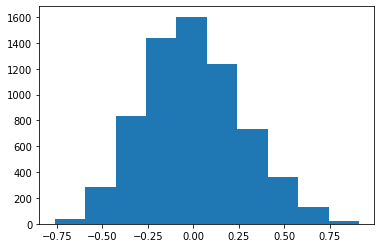

In [73]:
plt.hist(new_test.iloc[0,3:]);

In [49]:
y_pred_test=svr_reg.predict(test_final_df)

(array([ 4.,  5.,  8., 31., 41., 54., 32., 14.,  8.,  2.]),
 array([100.81918851, 102.35917765, 103.89916679, 105.43915593,
        106.97914507, 108.51913421, 110.05912335, 111.59911248,
        113.13910162, 114.67909076, 116.2190799 ]),
 <BarContainer object of 10 artists>)

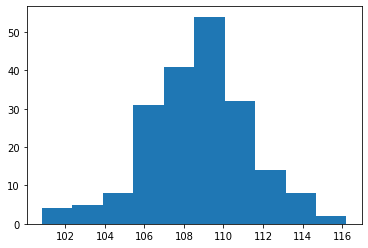

In [72]:
plt.hist(y_pred_test)

In [74]:
y_pred_test.max()

116.219079902716

In [50]:
y_pred_test

array([109.85441777, 108.39277004, 111.08723465, 110.36408987,
       108.688151  , 109.47698791, 106.21677321, 109.40234782,
       109.01665127, 108.02039767, 106.54843469, 103.74457317,
       107.43320198, 109.1642719 , 105.02757663, 113.28616026,
       107.69783864, 109.46038366, 108.1803827 , 110.99576696,
       111.48993641, 110.1399893 , 113.58507759, 111.77918267,
       107.97324133, 110.66118234, 112.14888286, 113.39003528,
       108.9383404 , 111.48414401, 109.56171593, 109.94991984,
       111.66532948, 112.4529169 , 109.23789156, 116.2190799 ,
       105.82084603, 106.35747718, 110.69309037, 105.07860744,
       110.88979843, 106.10768447, 110.17548194, 108.61296238,
       102.2785831 , 110.49400332, 112.00868415, 108.97528731,
       110.65812758, 108.67916757, 107.20407875, 105.75483184,
       106.8477371 , 107.42875296, 106.4462214 , 110.82386448,
       110.7565012 , 112.28904521, 108.898604  , 109.21479153,
       107.73449988, 108.70333854, 109.90669138, 110.03

In [51]:
df_leaderboard=pd.DataFrame({'id':test_df['id'],'target':y_pred_test})

In [52]:
df_leaderboard

,id,target
0,17,109.854418
1,19,108.392770
2,25,111.087235
3,32,110.364090
4,33,108.688151
...,...,...
194,777,110.193265
195,783,105.972706
196,784,106.718578
197,792,108.458579


In [44]:
df_leaderboard

,id,target
0,17,110.158718
1,19,107.920292
2,25,108.159483
3,32,104.923576
4,33,106.752830
...,...,...
194,777,113.772811
195,783,112.309465
196,784,113.409241
197,792,114.279185


In [53]:
df_leaderboard.to_csv('G14_11_crazy_preprocessing',index=False)